<a href="https://colab.research.google.com/github/epicalekspwner/BigScaleAnalytics2021/blob/main/Algo_bsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1/Libraries and lists

In [ ]:
#Libraries

import pandas as pd
import re
import string
from collections import Counter
import itertools
from collections import OrderedDict
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
from collections import Counter

In [ ]:
pip install spacy-lefff

In [ ]:
# Spacy library

!python -m spacy download fr_core_news_lg

from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import spacy
from spacy_lefff import LefffLemmatizer
from spacy.language import Language

nlp = spacy.load("fr_core_news_lg")

2021-05-07 13:53:50.778110: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_lg')


In [ ]:
# NLTK --> Stemming

from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

stemmer = PorterStemmer()
stemmerfr = SnowballStemmer("french")

In [ ]:
nlp = spacy.load('fr_core_news_lg')

In [ ]:
pip install deep-translator

In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
# Special lists/dict of char

liste_special_letters = ['é','è','ê','ë','à','ä','â','ï','î','ö','ô','ü','ù','û','ç']
contractions_dict = { "d'": "de ","n'":"ne ","l'":"le ","s'":"se ","c'":"ce ","j'":"je ","t'":"tu ","qu'":"que "}
stopWord = ['le','la','les','de','des','se','ce','à']
Fr_stp_modif = {'a', 'abord', 'afin', 'ah', 'ai', 'aie', 'ainsi',
 'alors', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 
 'assez',  'au', 'aucun', 'aucune', 'aujourd', "aujourd'hui", 'aupres',
 'auquel', 'aussi', 'autre', 'autrement', 'autres', 'autrui',
 'aux',  'auxquelles', 'auxquels',  'avant', 'avec',  'bas', 'basee', 'car', 'ce', 'ceci',
 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui',
 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 'cet', 'cette', 'ceux',
 'ceux ci', 'ceux là', 'chacun', 'chacune', 'chaque', 'chez', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième',
 'combien', 'comme', 'comment', 'compris', 'concernant', 'da', 'dans', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'depuis',
 'derriere', 'derrière', 'des', 'desormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant',
 'devers', 'devra', 'different', 'differentes', 'differents', 'différent', 'différente', 'différentes', 'différents', 'dire', 'directe',
 'directement', 'divers', 'diverse', 'diverses', 'dix', 'dix huit', 'dix neuf', 'dix sept', 'dixième', 'donc', 'dont', 'douze',
 'douzième', 'du', 'duquel', 'durant','dès', 'désormais', 'effet','egale', 'egalement', 'egales', 'eh', 'elle', 'elle même',
 'elles', 'elles mêmes', 'en', 'encore', 'enfin', 'entre','envers', 'environ','et', 'etc', 'eux', 'eux mêmes',
 'exactement',
 'excepté',
  'chat'
  'chien'
 'façon',

 'gens',
 'ha',
 'hem',
 'hep',
 'hi',
 'ho',
 'hormis',
 'hors',
 'hou',
 'houp',
 'hue',
 'hui',
 'huit',
 'huitième',
 'hé',
 'i',
 'il',
 'ils',
 'importe',
 "j ",
 'je',
 'jusqu',
 'jusque',
 'juste',
 'j ',
 "l ",
 'la',
 'laquelle',
 'le',
 'lequel',
 'les',
 'lesquelles',
 'lesquels',
 'leur',
 'leurs',
 'longtemps',
 'lors',
 'lorsque',
 'lui',
 'lui meme',
 'lui même',
 'là',
 'lès',
 'l ',
 "m ",
 'ma',
 'maint',
 'maintenant',
 'mais',
 'malgré',
 'me',
 'meme',
 'memes',
 'merci',
 'mes',
 'mien',
 'mienne',
 'miennes',
 'miens',
 'mille',
 'moi',
 'moi meme',
 'moi même',
 'moindres',
 'moins',
 'mon',
 'même',
 'mêmes',
 'm ',
 "n ",
 'na',
 'ne',
 'neanmoins',
 'neuvième',
 'ni',
 'nombreuses',
 'nombreux',
 'nos',
 'notamment',
 'notre',
 'nous',
 'nous-mêmes',
 'nouvea',
 'nul',
 'néanmoins',
 'nôtre',
 'nôtres',
 'n’',
 'o',
 'on',
 
 'onze',
 'onzième',
 'ore',
 'ou',
 'ouias',
 'oust',
 'outre',

 'ouverte',
 'ouverts',
 'où',
 'par',
 'parce',
 'parfois',
 'parmi',
 'parseme',
 'partant',
 'pas',
 'pendant',
 'pense',
 'permet',
 'personne',
 'peu',

 'plus',
 'plusieurs',
 'plutôt',
 'possible',
 'possibles',
 'pour',
 'pourquoi',

 'prealable',
 'precisement',
 'premier',
 'première',
 'premièrement',
 'pres',
 'procedant',
 'proche',
 'près',
 'pu',
 'puis',
 'puisque',
 "qu'",
 'quand',
 'quant',
 'quant à soi',
 'quanta',
 'quarante',
 'quatorze',
 'quatre',
 'quatre vingt',
 'quatrième',
 'quatrièmement',
 'que',
 'quel',
 'quelconque',
 'quelle',
 'quelles',
 "quelqu'un",
 'quelque',
 'quelques',
 'quels',
 'qui',
 'quiconque',
 'quinze',
 'quoi',
 'quoique',
 'qu’',
 'relative',
 'relativement',
 

 'retour',
 'revoici',
 'revoilà',
 "s ",
 'sa',
 'sait',
 'sans',
 'sauf',
 'se',
 'seize',
 'selon',
 'semblable',
 'semblaient',
 'semble',
 'semblent',
 'sent',
 'sept',
 'septième',

 'ses',
 'seul',
 'seule',
 'seulement',
 'si',
 'sien',
 'sienne',
 'siennes',
 'siens',
 'sinon',
 'six',
 'sixième',
 'soi',
 'soi même',
 'soit',
 'soixante',
 'son',

 'sous',
 'souvent',
 'specifique',
 'specifiques',
 'stop',
 'suffisant',
 'suffisante',

 'suivant',
 'suivante',
 'suivantes',
 'suivants',
 'suivre',
 'sur',
 'surtout',
 's ',
 "t ",
 'ta',
 'tant',
 'te',
 'tel',
 'telle',
 'tellement',
 'telles',
 'tels',
 'tenant',

 'tente',
 'tes',
 'tien',
 'tienne',
 'tiennes',
 'tiens',
 'toi',
 'toi-même',
 'ton',
 'touchant',
 'toujours',
 'tous',
 'tout',
 'toute',
 'toutes',
 'treize',
 'trente',
 'tres',
 'trois',
 'troisième',
 'troisièmement',
 'tu',
 'té',
 't ',
 'un',
 'une',
 'unes',
 'uns',
 'va',
 'vais',
 'vas',
 'vers',
 'via',
 'vingt',
 'voici',
 'voilà',
 'vont',
 'vos',
 'votre',
 'vous',
 'vous mêmes',
 'vu',
 'vé',
 'vôtre',
 'vôtres',
 'à',
 'â',
 'ça',
 'ès',
 'ô'}



In [ ]:
name_female = pd.read_csv('https://gist.githubusercontent.com/dmassiani/c669d79aa27b93cf03b8f0eb5088bde6/raw/52fad81fa091b23a812259e114bb5f11f9691ade/Liste%2520des%2520pr%25C3%25A9noms%2520fran%25C3%25A7ais%2520f%25C3%25A9minins', header=None)
name_male = pd.read_csv('https://gist.githubusercontent.com/dmassiani/d3ad74eed7903dd2e36fb71b0d5de39e/raw/fa34fd3d006171ae92842e3ec7b06647609f726f/Liste%2520des%2520pr%25C3%25A9noms%2520fran%25C3%25A7ais%2520masculins', header= None)
name_list = name_female.values.tolist()
name_list.append(name_male.values.tolist())

In [ ]:
len(name_list)

459

## 2/ Data cleaning

### Cleaning

In [ ]:
# Dataframe with french sentences and level

df = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/train_data.txt?token=AQ7V5XW3VL7FAFWEOJHQSOLATJ7KG', delimiter=',')
df = df.sample(frac=1).reset_index(drop=True)
df = df.rename(columns = {'sentence':'Sentences','difficulty':'Level'})
df['Level_cat'] = df['Level'].astype('category').cat.codes
#NOTE:to apply these functions make sure that the language level are called "Level" and the sentences "Sentences"'''

In [ ]:
base_rate = max(df.value_counts('Level'))/df.shape[0]
print('Base rate:', round(base_rate,2))

Base rate: 0.17


In [ ]:
def cleaning_general(df):

    # Data cleaning 1 --> char replacement + lower

    df['Sentences'] = df['Sentences'].apply(lambda x: x.replace("’","'"))
    df['Sentences'] = df['Sentences'].apply(lambda x: x.lower())


#-------------------------------------------------------------------------------


    # Punctuation counter
  
    def punctuation_counter(sentence):  
      counter = 0
      for i in range (0, len(sentence)):
        if sentence[i] in string.punctuation:
          counter += 1
      return counter
      
    df['Sentences_punctuation_nb'] = df['Sentences'].apply(lambda x:punctuation_counter(x)) 


#-------------------------------------------------------------------------------


    # Data cleaning 2 --> Contractions expanding

    contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

        # Function for expanding contractions

    def expand_contractions(text,contractions_dict=contractions_dict):
      def replace(match):
        return contractions_dict[match.group(0)]
      return contractions_re.sub(replace, text)

    df['Cleaning1'] = df['Sentences'].apply(lambda x: expand_contractions(x))


    #-------------------------------------------------------------------------------


    # Data cleaning 3 --> Punctuation removal

    def punctuation_removal(text):
        all_list = [char for char in text if char not in string.punctuation]
        clean_str = ''.join(all_list)
        return clean_str

    df['Cleaning2'] = df['Cleaning1'].apply(lambda x: punctuation_removal(x))


#-------------------------------------------------------------------------------

        # Length of a sentence (Aleks)


    def sentence_lenght(df):
      length_sentence = len(df.split())
      return length_sentence

    df['Sentences_length'] = df['Cleaning2'].apply(lambda x:sentence_lenght(x))

#-------------------------------------------------------------------------------


    # Data cleaning 4 --> Remove special char (took into account french special char e.g. "ç","é")

    def bin_spe(tweet):
        tweet = ' '.join(re.sub("[^0-9a-zÀ-ÿ-A-Z-ç \t]"," ", tweet).split())
        return tweet

    df['Cleaning3'] = df['Cleaning2'].apply(lambda x: bin_spe(x))


    #-------------------------------------------------------------------------------


    # Data cleaning 5 --> Stop words removal and names

    def stopword_removal(text):
        all_list = [char for char in text if char not in stopWord ]
        all_list = [char for char in text if char not in name_list]
        clean_str = ''.join(all_list)
        return clean_str

    df['Cleaning3'] = df['Cleaning2'].apply(lambda x: stopword_removal(x))


    #-------------------------------------------------------------------------------


    # Data cleaning 6 --> remove alone letter and words with len() ==2

    def remove_alone_letters_and_len2(texte):
        texte = ' '.join(i for i in texte.split() if not len(i) == 1 and not len(i) == 2)
        return texte

    df['Cleaning4'] = df['Cleaning3'].apply(lambda x: remove_alone_letters_and_len2(x))

    return df

In [ ]:
def lemma_and_Leff(df1):
    
    
    # Count top 100 words whole dataset

    Counter(" ".join(df1["Cleaning4"]).split()).most_common(100)


    #-------------------------------------------------------------------------------


    # Lemmatization --> OUTPUT: Token

    def lemma_french_token(text):
      doc = nlp(text)
      liste1 = []
      for token in doc:
        liste1.append(token.lemma_)
      return liste1

    df1['lemma'] = df1['Cleaning4'].apply(lambda x: lemma_french_token(x))


    #-------------------------------------------------------------------------------


    # Lemmatization --> OUTPUT: sentence

    def lemma_french_full_sentence(text):
      doc = nlp(text)
      lemmatized_output = ' '.join([w.lemma_ for w in doc])
      return lemmatized_output

    df1['lemma'] = df1['Cleaning4'].apply(lambda x: lemma_french_full_sentence(x))


    #-------------------------------------------------------------------------------


    # Count to 100 words after lemma whole dataset

    Top_100_lemma = Counter(" ".join(df1["lemma"]).split()).most_common(100)


    #-------------------------------------------------------------------------------


    # Get a list of the top 100 words in the dataset

    def count_to_list(my_list_count_100):
      list2 = []
      for my_tuple in my_list_count_100:
          list2.append(my_tuple[0])
      return list2

    List_top_100 = count_to_list(Top_100_lemma)


    List_top_100

    # Data cleaning 7 --> Common word removal

    def common_word_removal(text):

        all_list =  " ".join([word for word in text.split() if word not in List_top_100])
        
        return all_list

    df1['Cleaning7'] = df1['lemma'].apply(lambda x: common_word_removal(x))


    #-------------------------------------------------------------------------------


    def List_STP_word_removal(text):

        all_list =  " ".join([word for word in text.split() if word not in Fr_stp_modif])
        
        return all_list

    df1['Cleaning8'] = df1['Cleaning7'].apply(lambda x: List_STP_word_removal(x))


#-------------------------------------------------------------------------------

#Create dict that returns the type of the word as value and as key the word {"word" : "Type"}

    def POS_french_token(sentences):
        dict1 = {}
        doc = nlp(sentences)
        for token in doc:
          dict1.update({token.text : token.pos_})
        return dict1

    df1['POS_LEFFF2'] = df1['lemma'].apply(lambda x: POS_french_token(x))
    df1['POS_without_lemma'] = df1['Cleaning4'].apply(lambda x: POS_french_token(x))


    


    #Get a list from dict with all the verbs

    def get_dict_value_verb(POS_dict):
          
        liste_verb =[]

        for key, value in POS_dict.items():
          
          if value == 'VERB':
             liste_verb.append(key)
        return liste_verb


    df1['Listes_verb'] = df1['POS_LEFFF2'].apply(lambda x: get_dict_value_verb(x))

#-------------------------------------------------------------------------------


# Get a liste from dict with all the nouns


    def get_dict_value_noun(POS_dict):
          
        liste_noun =[]

        for key, value in POS_dict.items():
          
            if value == 'NOUN':
               liste_noun.append(key)
        return liste_noun


    df1['Listes_noun'] = df1['POS_LEFFF2'].apply(lambda x: get_dict_value_noun(x))


    return df1

#-------------------------------------------------------------------------------

In [ ]:
# Final functions that applied the cleaning functions and the lemma and POS functions

def cleaning_Leff(df):
  cleaning_general(df)
  lemma_and_Leff(df)
  return df

#-------------------------------------------------------------------------------

In [ ]:
# Transform list of list into one single list + remove duplicate nouns

def flat_list_noun(df1):

    cleaning_Leff(df1)
    liste_noun = df1['Listes_noun'].tolist()
    flat_list_noun = list(itertools.chain(*liste_noun))
    flat_list_noun = sorted(flat_list_noun,reverse=True)
    flat_list_noun = list(OrderedDict.fromkeys(flat_list_noun))

    return flat_list_noun

#-------------------------------------------------------------------------------

def flat_list_verb(df1):

    cleaning_Leff(df1)
    liste_verb = df1['Listes_verb'].tolist()
    flat_list_verb = list(itertools.chain(*liste_verb))
    flat_list_verb = sorted(flat_list_verb,reverse=True)
    flat_list_verb = list(OrderedDict.fromkeys(flat_list_verb))

    return flat_list_verb

#-------------------------------------------------------------------------------

In [ ]:
## DEAL WITH DECEPTIVE COGNOMES

In [ ]:
# Similarity check

import difflib

def stem_checker(stem1,stem2):

  sequence = round(difflib.SequenceMatcher(None,stem1,stem2).ratio()*100)
  return sequence 

# https://www.kite.com/python/docs/difflib.SequenceMatcher

#-------------------------------------------------------------------------------

In [ ]:
# Dataframe with Deceptive cognomes (false friends) 

main_Dcognomes= pd.read_csv('https://raw.githubusercontent.com/mbayle98/S2_project/main/BIGSCALE/Cognomes_df.txt', delimiter = "\t")

main_Dcognomes['eng_stem'] = main_Dcognomes['English'].apply(lambda x: stemmer.stem(x))
main_Dcognomes['fr_stem'] = main_Dcognomes['Français'].apply(lambda x: stemmerfr.stem(x))
main_Dcognomes['ratio_similarity'] = main_Dcognomes.apply(lambda x: stem_checker(x['eng_stem'],x['fr_stem']),axis = 1)

main_Dcognomes_dict = dict(zip(main_Dcognomes.Français,main_Dcognomes.ratio_similarity))
main_Dcognomes

,English,Français,eng_stem,fr_stem,ratio_similarity
0,abuse,insulter,abus,insult,20
1,academic,universitaire,academ,universitair,11
2,accomodate,loger,accomod,log,20
3,actual,réel,actual,réel,20
4,actual,effectif,actual,effect,33
...,...,...,...,...,...
140,shade,store,shade,stor,22
141,implore,supplier,implor,suppli,33
142,supervise,surveiller,supervis,surveil,67
143,translation,translation géométrique,translat,translation géometr,59


In [ ]:
## DEAL WITH COGNOMES FINAL DATAFRAME

In [ ]:
main_df= pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/MAINDF_.txt?token=AQ7V5XWU4PMHCIPYGZ4XRJ3ATEQBQ', delimiter = "\t")
main_df = main_df.drop_duplicates()


In [ ]:
main_df

,ENG,FR,eng_stem,fr_stem,ratio_similarity
0,aback,décontenancé,aback,décontenanc,25
1,airlock,sas,airlock,sas,20
2,airsick,le mal de l'air,airsick,le mal de l'air,27
3,alack,un manque,alack,un manqu,15
4,amok,amok,amok,amok,100
...,...,...,...,...,...
15606,vocation,vocation,vocat,vocat,100
15607,volition,volition,volit,volit,100
15608,westernisation,occidentalisation,westernis,occidentalis,38
15609,workstation,poste de travail,workstat,poste de travail,33


In [ ]:

def similarity_spacy(term1, term2):

    tokens = nlp(term1 + " " + term2)

    print(tokens[0].text, "|",tokens[1].text, tokens[0].similarity(tokens[1]))

    return tokens[0].similarity(tokens[1])
  
main_df['Similarity_SPACY'] = main_df.apply(lambda x: similarity_spacy(x['eng_stem'], x['fr_stem']), axis = 1).to_frame()
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
vile | vil 0.530125
villag | villag 1.0
vindict | vindiqu 0.0
vine | vign 0.0
vintag | vintag 1.0
violenc | la 0.0
viril | viril 1.0
virtu | vertu 0.0
virul | virulent 0.0
visag | visag 1.0
viscos | viscos 1.0
vise | vic -0.10196803
visibl | visibl 1.0
visualis | visualis 1.0
vitalis | vitalis 1.0
vitup | vituper 0.0
vocalis | vocalis 1.0
voc | vocat 0.0
vogu | vogu 1.0
voic | voix 0.1746065
voil | voil 1.0
volatil | volatil 1.0
vole | campagnol 0.050593425
voltag | tension 0.0
volubl | volubil 0.0
volum | le -0.0059361407
volut | volut 1.0
vote | vot 0.053590838
votiv | votif 0.0
vouchsaf | accord 0.0
voyag | voyag 1.0
vulcanis | vulcanis 1.0
vulpin | vulpin 1.0
vultur | vautour 0.0
waddl | se 0.0
wade | pataug 0.0
waffl | gaufr 0.0
waftur | waftur 1.0
wage | salair 0.0
waggl | remu 0.0
waistlin | taill 0.0
waiv | renoncer 0.0
wake | se -0.043140236
walkietalki | talkie 0.0
wane | déclin 0.0
warbl | gazouill

In [ ]:
main_dict = dict(zip(main_df.FR,main_df.Similarity_SPACY))
main_df

,ENG,FR,eng_stem,fr_stem,ratio_similarity,Similarity_SPACY
0,aback,décontenancé,aback,décontenanc,25,0.0
1,airlock,sas,airlock,sas,20,0.0
2,airsick,le mal de l'air,airsick,le mal de l'air,27,0.0
3,alack,un manque,alack,un manqu,15,0.0
4,amok,amok,amok,amok,100,1.0
...,...,...,...,...,...,...
15606,vocation,vocation,vocat,vocat,100,1.0
15607,volition,volition,volit,volit,100,1.0
15608,westernisation,occidentalisation,westernis,occidentalis,38,0.0
15609,workstation,poste de travail,workstat,poste de travail,33,0.0


In [ ]:
def lemma_french_token(text):
  doc = nlp(text)
  liste1 = []
  for token in doc:
    liste1.append(token.lemma_)
  return liste1

In [ ]:
def Check_Dcognomes(sentences):
  
    sentence_clean = ""
    lemm_sentence = lemma_french_token(sentences)
    doc = TreebankWordDetokenizer().detokenize(lemm_sentence)
    doc = nlp(doc)

    for token in doc:
      if token.pos_ == 'NOUN'or token.pos_ == 'VERB' or token.pos_ =='ADJ':
        sentence_clean = sentence_clean + ' ' + token.text
      
    nb_Dcognomes = 0
    sentence = sentence_clean.split()
    for i in sentence:
      if i in main_Dcognomes_dict:
        nb_Dcognomes = nb_Dcognomes + 1
    
    
    return nb_Dcognomes

In [ ]:
def count_DeceptiveCognome_and_similarity_score(sentences):

  sentence_clean = ""
  lemm_sentence = lemma_french_token(sentences)
  doc = TreebankWordDetokenizer().detokenize(lemm_sentence)
  doc = nlp(doc)

  for token in doc:
    if token.pos_ == 'NOUN'or token.pos_ == 'VERB' or token.pos_ =='ADJ':
      sentence_clean = sentence_clean + ' ' + token.text

  similarity_score_Dcognomes = 0
  similarity_score_tt = 0
  list_words = []
  doc = sentence_clean.split()

  for i in doc:
    if i in main_Dcognomes_dict.keys():
      similarity_score_Dcognomes = similarity_score_Dcognomes + main_Dcognomes_dict[i]
      
    if i in main_dict.keys():
      similarity_score_tt = similarity_score_tt + main_dict[i]

    final_score = similarity_score_tt - similarity_score_Dcognomes

    return  final_score

In [ ]:
def Dcognomes_similarityscore(df1):
  
    df1['Nb_Dcognomes'] = df1['lemma'].apply(lambda x: Check_Dcognomes(x))
    df1['score'] = df1['lemma'].apply(lambda x: count_DeceptiveCognome_and_similarity_score(x))

    return df1


In [ ]:
from collections import Counter

In [ ]:
def Counting_df(df):

    def counting_by_category(sentences):                                 # Function that returns a dict{Part-of-speech: number of words contained} that composed each tweet
      liste1 = []
      doc = nlp(sentences)
      for token in doc:
          liste1.append(token.tag_)                         
      return liste1

    df['POS'] = df['Cleaning3'].apply(lambda x: counting_by_category(x))
    df['counting'] = df['POS'].apply(lambda x: Counter(x))

    feature_wordcount = pd.DataFrame(df['counting'])
    feature_wordcount = feature_wordcount['counting'].apply(pd.Series)
    feature_wordcount = feature_wordcount.fillna(0)
    
    return feature_wordcount

In [ ]:
def final_df(df):

  cleaning_Leff(df)
  Dcognomes_similarityscore(df)
  df_final = Counting_df(df).copy()
  df_final['Level']= df['Level_cat']
  df_final['Sentences_punctuation_nb'] = df['Sentences_punctuation_nb']
  df_final['Sentences_len'] = df['Sentences_length']
  df_final['score'] = df['score']
  df_final['D_cognome'] = df['Nb_Dcognomes']
  
  return df_final


final_df = final_df(df)


In [ ]:
final_df['Level']= df['Level_cat']

In [ ]:
df.head(5)

In [ ]:
final_df

,DET,NOUN,ADP,VERB,ADJ,CCONJ,PRON,AUX,SPACE,ADV,SCONJ,NUM,PUNCT,PROPN,X,INTJ,Level,Sentences_punctuation_nb,Sentences_len,score,D_cognome
0,2.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5,14,0.000000,0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,3,0.000000,0
2,1.0,1.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,10,-0.057812,0
3,12.0,16.0,13.0,13.0,11.0,4.0,17.0,2.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,5,19,94,0.000000,1
4,12.0,19.0,11.0,8.0,4.0,6.0,9.0,2.0,1.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,5,16,83,0.112753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,10.0,15.0,14.0,14.0,5.0,2.0,12.0,2.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,5,13,82,0.000000,0
4796,7.0,11.0,11.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4,6,39,0.000000,0
4797,1.0,1.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,9,0.262564,0
4798,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1,3,11,0.000000,0


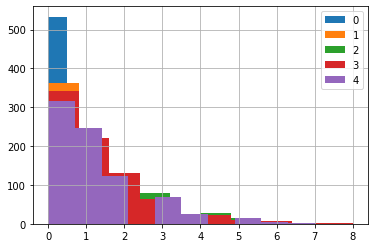

In [ ]:
import matplotlib.pyplot as plt


final_df.loc[final_df['Level']==0,'ADV'].hist(label=0)
final_df.loc[final_df['Level']==1,'ADV'].hist(label=1)
final_df.loc[final_df['Level']==2,'ADV'].hist(label=2)
final_df.loc[final_df['Level']==3,'ADV'].hist(label=3)
final_df.loc[final_df['Level']==4,'ADV'].hist(label=4)
#final_df.loc[final_df['Level']==5,'ADV'].hist(label=5)

plt.legend()



In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


final_df.corr()

,DET,NOUN,ADP,VERB,ADJ,CCONJ,PRON,AUX,SPACE,ADV,SCONJ,NUM,PUNCT,PROPN,X,INTJ,Level,Sentences_punctuation_nb,Sentences_len,score,D_cognome
DET,1.000000,0.912830,0.817008,0.692463,0.697489,0.595888,0.419945,0.293171,0.469744,0.358407,0.346189,0.170499,0.040746,0.103064,0.021871,-0.006087,0.478302,0.772409,0.914937,0.005989,0.305105
NOUN,0.912830,1.000000,0.919697,0.673410,0.725014,0.625086,0.385024,0.280612,0.459737,0.341492,0.327263,0.249232,0.039835,0.096702,0.022353,-0.011488,0.520296,0.802147,0.942427,0.001587,0.328804
ADP,0.817008,0.919697,1.000000,0.669933,0.680167,0.558796,0.392606,0.268800,0.395174,0.337739,0.296172,0.255242,0.036475,0.112586,0.031283,-0.013557,0.492087,0.761480,0.910096,0.001025,0.310555
VERB,0.692463,0.673410,0.669933,1.000000,0.510203,0.549595,0.660538,0.258756,0.452405,0.413192,0.446059,0.135163,0.041576,0.088262,0.022104,-0.009095,0.387827,0.693212,0.813123,0.014599,0.238222
ADJ,0.697489,0.725014,0.680167,0.510203,1.000000,0.547523,0.326468,0.282097,0.379872,0.351646,0.318480,0.137794,0.029973,0.073663,0.021653,-0.009676,0.467055,0.673918,0.778069,-0.007981,0.320480
CCONJ,0.595888,0.625086,0.558796,0.549595,0.547523,1.000000,0.423252,0.217424,0.301147,0.315362,0.258779,0.125898,0.032305,0.101205,-0.001285,-0.011638,0.295598,0.552942,0.687975,0.004321,0.218630
PRON,0.419945,0.385024,0.392606,0.660538,0.326468,0.423252,1.000000,0.299505,0.427630,0.353137,0.407615,0.046654,0.029860,0.064437,0.006667,0.017626,0.115433,0.533328,0.586812,0.004699,0.133546
AUX,0.293171,0.280612,0.268800,0.258756,0.282097,0.217424,0.299505,1.000000,0.238240,0.231131,0.268764,0.087680,0.005621,0.070340,0.023507,-0.010563,0.131079,0.315238,0.383303,-0.029690,0.159307
SPACE,0.469744,0.459737,0.395174,0.452405,0.379872,0.301147,0.427630,0.238240,1.000000,0.290128,0.253209,0.168652,0.045925,0.041823,-0.007913,-0.009653,0.177681,0.537343,0.512275,-0.008926,0.125093
ADV,0.358407,0.341492,0.337739,0.413192,0.351646,0.315362,0.353137,0.231131,0.290128,1.000000,0.346777,0.079381,0.042337,0.020472,0.024686,0.021200,0.201325,0.435523,0.492791,-0.027661,0.134321


# 3/ Algorithmes

## 📦 **Import Required Libraries**

In [ ]:
# sklearn library
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE = LabelEncoder()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

## a) Regression Linéaire, Logistique, SVM

In [ ]:
final_df = final_df.fillna(0)
X = final_df[['PRON','VERB','ADP','ADJ','CCONJ','PROPN','ADV','SCONJ','Sentences_punctuation_nb','Sentences_len','D_cognome','score']]
Y = final_df['Level']

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=42)
model_1= LinearRegression().fit(X_train,y_train)
R_2 = model_1.score(X_train,y_train)
print('The R² is: ',R_2)

The R² is:  0.3211893655243445


In [ ]:
Y

In [ ]:
model_1= LinearRegression().fit(X_train,y_train)
R_2 = model_1.score(X_test,y_test)
print('The R² is: ',R_2)

The R² is:  0.29437383760068325


In [ ]:
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
np.random.seed = 72

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=72)

from sklearn import preprocessing
std = StandardScaler()
std.fit(X_train, y_train)

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [ ]:
LReg_CV = LogisticRegressionCV(penalty = 'l2',solver='lbfgs', cv=8, max_iter=3000, random_state=72)

LReg_CV.fit(X_train, y_train)

Accuracy_Train = LReg_CV.score(X_test, y_test)
print("The accuracy for the test is: ", round(Accuracy_Train,2))

The accuracy for the test is:  0.38


In [237]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=72)


regr = make_pipeline(StandardScaler(), SVR(C=6, epsilon=0.9))
regr.fit(X_train, y_train)

Accuracy_Test = regr.score(X_test, y_test)
print("The accuracy for the tESTis: ", round(Accuracy_Test,2))

pred = regr.predict(X_test)

The accuracy for the tESTis:  0.48


In [255]:
new_df

,Level
4420,5
1717,4
552,4
4314,4
2120,4
...,...
3252,5
3285,3
1866,1
1869,0


In [259]:
new_df = y_test.to_frame().reset_index()
df1 = pd.DataFrame(pred)
df1['y_test']= new_df['Level']

In [261]:
df1.head(15)

,0,y_test
0,4.383400,5
1,3.857510,4
2,2.753795,4
3,3.255171,4
4,3.412547,4
5,1.432688,1
6,4.249719,3
7,2.387093,4
8,2.902404,3
9,2.082609,1


The accuracy for the test is:  0.39


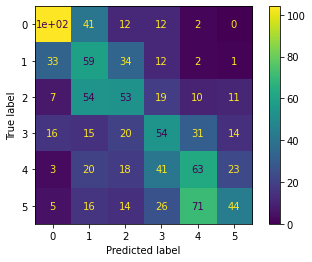

In [ ]:
classifier = svm.SVC(C=6).fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=72)


Accuracy_Test = classifier.score(X_test, y_test)
print("The accuracy for the test is: ", round(Accuracy_Test,2))


disp = plot_confusion_matrix(classifier, X_test, y_test)

 

## 📈 **Logistic Regression**

In [ ]:
X = final_df[['PRON','VERB','ADP','ADJ','CCONJ','PROPN','ADV','SCONJ','Sentences_punctuation_nb','Sentences_len','D_cognome','score']]
X.shape

(4800, 12)

In [ ]:
y = df['Level']
y.shape

(4800,)

### B) **Feature engineering**

In [ ]:
X = final_df[['PRON','VERB','ADP','D_cognome','score','Sentences_len']]

In [ ]:
### Hyperparameters optimization with location

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 72)

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

LogR_std_location = Pipeline([('scaler', scaler),('LR', LogisticRegression(max_iter = 50000))]) # Standardization (mean 0 std 1)
LogR_std_location.get_params().keys() # Get params

param_logR_location = {
   
    'LR__C': (5,6,7,10),
   
    'LR__max_iter': (1000, 5000),
   
    }

grid_search_logR_location = GridSearchCV(LogR_std_location, param_logR_location, cv = 5)
grid_search_logR_location.fit(X_train_loc, y_train_loc)
print(grid_search_logR_location.best_params_)

Accuracy_basic_logR_location = grid_search_logR_location.score(X_test_loc, y_test_loc)
print('Accuracy of pipeline: ', round(Accuracy_basic_logR_location, 3))

{'LR__C': 6, 'LR__max_iter': 1000}
Accuracy of pipeline:  0.367


## 🏘️ **kNNeighbours**

In [ ]:
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X, y, test_size = 0.1, random_state = 72)

In [ ]:
X_trainWR, X_testWR, y_trainWR, y_testWR= train_test_split(X, y, test_size = 0.1, random_state = 72)
KNN_word = Pipeline([('knn', KNeighborsClassifier())])

param_knn = {
      'knn__leaf_size': (50, 70, 60,10),
      'knn__p': (1,2),                        # Manhattan/Euclidian distance
      'knn__n_neighbors': (13, 15, 17, 19),   # Tried (1, 5, 9, 21) then refine because knew between 19 and 13
      'knn__weights': ('uniform', 'distance')
    } 

grid_search_knn_WR = GridSearchCV(KNN_word, param_knn, cv = 5)
grid_search_knn_WR.fit(X_trainWR,y_trainWR)
print(grid_search_knn_WR.best_params_)

Accuracy_basic_knn_RW = grid_search_knn_WR.score(X_testWR, y_testWR)
print('Accuracy of word category with KNN is: ', round(Accuracy_basic_knn_RW, 3))
pred_y_lex = grid_search_knn_WR.predict(X_testWR)
matrix_knn_lex = confusion_matrix(y_testWR,pred_y_lex)

{'knn__leaf_size': 10, 'knn__n_neighbors': 19, 'knn__p': 1, 'knn__weights': 'uniform'}
Accuracy of word category with KNN is:  0.39


## 🌲 **Decision Trees**

In [ ]:
### No use of features, only tweets are used

X_trainDF, X_testDF, y_trainDF, y_testDF = train_test_split(X, y, test_size = 0.1, random_state = 72)

pipeDF = Pipeline([('DF', DecisionTreeClassifier())])                            

pipeDF.fit(X_trainDF, y_trainDF)
print('Accuracy of DT no optimization is: ', round(pipeDF.score(X_testDF, y_testDF), 3))

Accuracy of DT no optimization is:  0.342


In [ ]:
### Optimization of hyperparameters

param_DF = {'DF__min_samples_split' : [5],'DF__max_depth': [3]} # Started really large (10, 50, 100, 200) then reduced to get between 70 and 75
grid_search_DF = GridSearchCV(pipeDF, param_DF, cv = 5)
grid_search_DF.fit(X_trainDF, y_trainDF)

print(grid_search_DF.best_params_)
print('Accuracy of Decision tree optimized is: ', round(grid_search_DF.score(X_testDF, y_testDF), 3))

{'DF__max_depth': 3, 'DF__min_samples_split': 5}
Accuracy of Decision tree optimized is:  0.36


## 🌳 **Random Forest**

In [ ]:
X_trainW, X_testW, y_trainW, y_testW= train_test_split(X, y, test_size = 0.1, random_state = 72)

In [ ]:
RF_word = Pipeline([('RF', RandomForestClassifier())])

param_RF = {
      'RF__bootstrap': [True,False], 
      #'RF__max_depth': [80, 90, 100, 110], 
      #'RF__max_features': [5, 10, 20], 
      #'RF__min_samples_leaf' : [3, 4, 5], 
      #'RF__min_samples_split': [10, 17, 11,20,30], 
      'RF__n_estimators': [15,16,17,18,19,20],
      'RF__criterion': ["gini", "entropy"], 
}
    
grid_search_RFL = GridSearchCV(RF_word, param_RF, cv = 5)
grid_search_RFL.fit(X_trainW, y_trainW)

print(grid_search_RFL.best_params_)
print('Accuracy of random forest : ', round(grid_search_RFL.score(X_testW, y_testW), 3))

{'RF__bootstrap': True, 'RF__criterion': 'entropy', 'RF__n_estimators': 19}
Accuracy of random forest :  0.352


In [ ]:
def words_list(df):

  common_words_cate = df.groupby("Level")["Cleaning7"].apply(lambda x: Counter(" ".join(x).split()).most_common(100)).to_frame()

  len_before = common_words_cate['Cleaning7'].apply(lambda x: len(x))

  common_words_cate = common_words_cate.explode('Cleaning7')
  common_words_cate['word'],common_words_cate['freq'] = common_words_cate.Cleaning7.str
  common_words_cate['len_before'] = common_words_cate['word'].apply(lambda x: len(x))
  common_words_cate = common_words_cate['word'].drop_duplicates().to_frame()
  common_words_cate = common_words_cate.groupby('Level')['word'].apply(list).to_frame()

  len_after = common_words_cate['word'].apply(lambda x: len(x))

  final_df = pd.DataFrame()
  final_df['len_before'] = len_before
  final_df['len_after'] = len_after

  return final_df

words_list(df)
